## Handling Imbalanced Datasets – Upsampling & Downsampling

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

In [39]:
np.random.seed(123)

n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples - n_class_0

In [40]:
n_class_0,n_class_1

(900, 100)

In [57]:

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [61]:
class_0.shape,class_1.shape

((900, 3), (100, 3))

In [100]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.tail()

,feature_1,feature_2,target
995,0.767416,-0.597918,1
996,-0.390585,-1.397932,1
997,-0.026745,-0.472266,1
998,-0.445473,0.581964,1
999,-0.821908,0.970613,1


In [101]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

## 1. Upsampling (Minority Class Oversampling)

Definition: Increase the number of samples in the minority class by replicating or generating synthetic samples.

When to Use:

Minority class has very few samples compared to majority class.

You want to balance dataset without losing data.

In [104]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [106]:
from sklearn.utils import resample
df_minority_update=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_minority_update.shape

(900, 3)

In [109]:

df_upsamples=pd.concat([df_majority,df_minority_update]).reset_index(drop=True) 
df_upsamples['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## 2. Downsampling (Majority Class Undersampling)

Definition: Reduce the number of samples in the majority class to match minority class.

When to Use:

Dataset is very large and computational cost is high.

You are okay with losing some data from majority class.

In [110]:
from sklearn.utils import resample
df_majority_update=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
df_majority_update.shape

(100, 3)

In [111]:
df_downsamples=pd.concat([df_minority,df_majority_update]).reset_index(drop=True) 
df_downsamples['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE
SMOTE (Synthetic Minority Oversampling Technique)
What is SMOTE?

SMOTE is an advanced technique to handle imbalanced datasets.

It generates synthetic samples (not duplicates) for the minority class by interpolating between existing samples.

Helps models learn better decision boundaries by providing more diverse data for the minority class.

How SMOTE Works?

Select a random sample from the minority class.

Find its k-nearest neighbors (default k=5).

Randomly select one neighbor and create a synthetic data point along the line connecting them.

When to Use SMOTE?

When dataset is highly imbalanced.

When simple upsampling (copying data) may cause overfitting.

Best for continuous/numeric features; less suitable for categorical-only data.


In [3]:
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.9],random_state=12,n_redundant=0)

In [6]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
df=pd.concat([df1,df2],axis=1)

df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

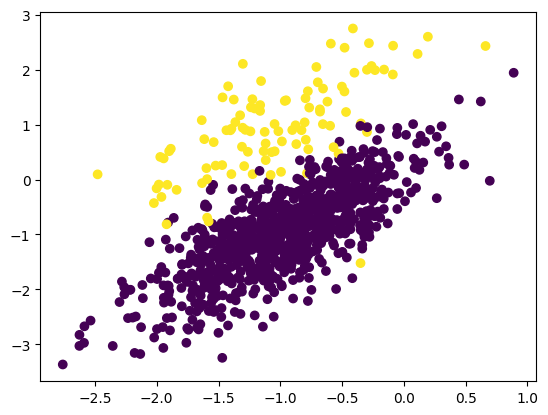

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [10]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
x,y=oversample.fit_resample(df[['f1','f2']],df['target'])

x.shape,y.shape

((1800, 2), (1800,))

In [12]:
y.value_counts()

target
0    900
1    900
Name: count, dtype: int64

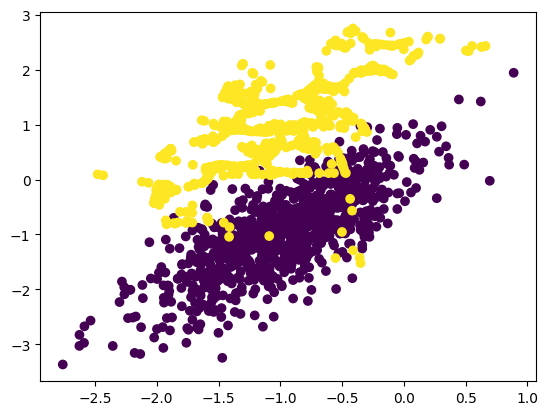

In [15]:
df_update=pd.concat([x,y],axis=1)

plt.scatter(df_update['f1'],df_update['f2'],c=df_update['target'])